
- Supervised vs Unsupervised Learning
- Machine Learning Problems - Regressions vs Classification Problem

### Supervised vs Unsupervised Learning

. Features and Label,
> label: is the column that we're triing to predict, ususally refered to as the y variable

> Features: input variables: other columns that will help our model understand how to predict the label


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### metadata
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Classwork:**
    - Predict loan Amount - Regression
    - Predict if a customer would repay or not repay a loan - Classification
    - Predict the price of house - Regression
    - Predict if Mr a has a cancer - Classification

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [7]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [8]:
df['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

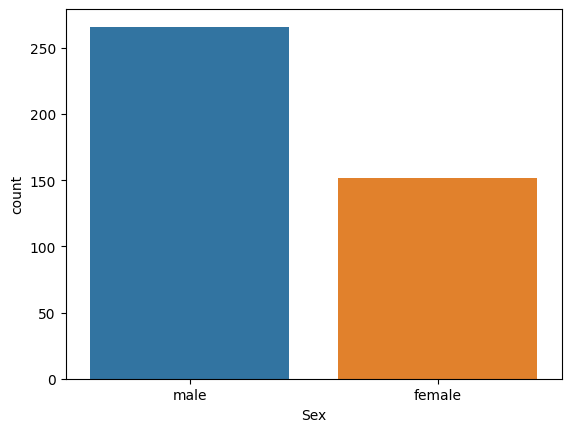

In [9]:
sns.countplot(data=df, x='Sex');

In [10]:
df['Age'].isnull().sum()

86

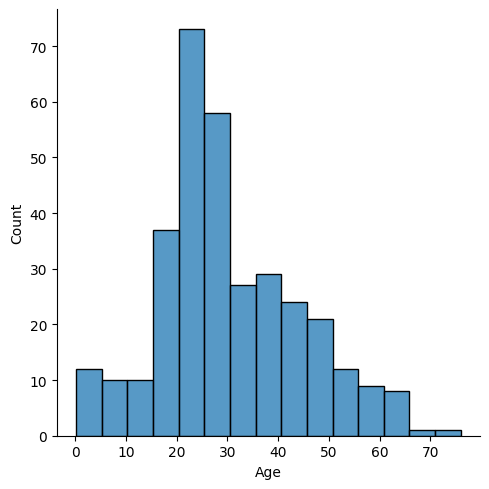

In [48]:
sns.displot(data=df, x='Age')

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
df[df['Age'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [51]:
df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

<AxesSubplot: xlabel='Embarked', ylabel='Age'>

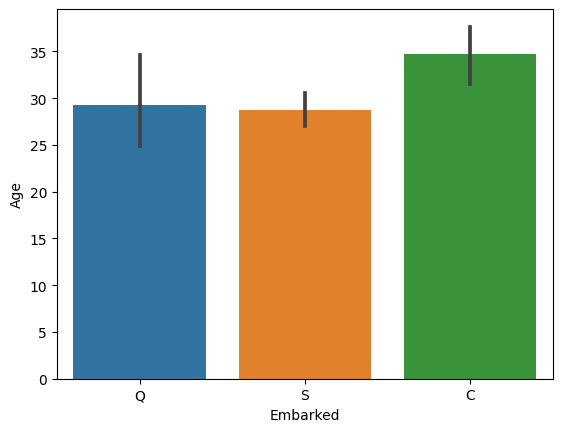

In [52]:
sns.barplot(data=df, x='Embarked', y='Age')

<AxesSubplot: xlabel='Embarked', ylabel='Age'>

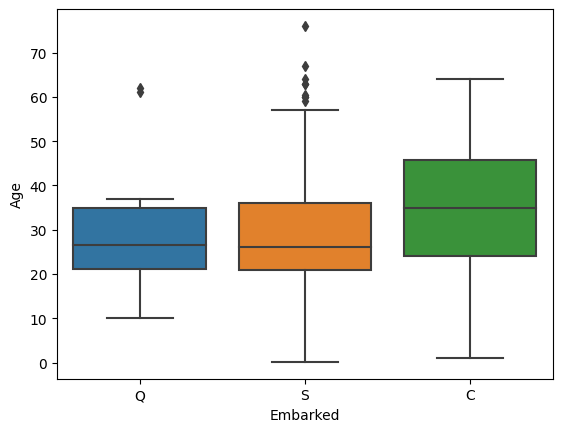

In [53]:
sns.boxplot(data=df, x='Embarked', y='Age')

In [54]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [55]:
# df['Age'].fillna(df['Age'].mean(), inplace=True)

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
#df_new = df[['PassengerId', 'Survived', 'Pclass', 'SibSp',
#      'Parch', 'Fare',]]

In [59]:
def fillAge(cols):
    embarked = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
            if (embarked == 'Q'):
                return 29
            elif (embarked == 'S'):
                return 29
            else:
                return 35
    else:
            return age

In [60]:
df['Age'] = df[['Embarked','Age']].apply(fillAge, axis=1)

In [61]:
df['Age'].isnull().sum()

0

In [62]:
df.corr()['Survived']

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.006940
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Name: Survived, dtype: float64

In [63]:
df.fillna(0, inplace=True)

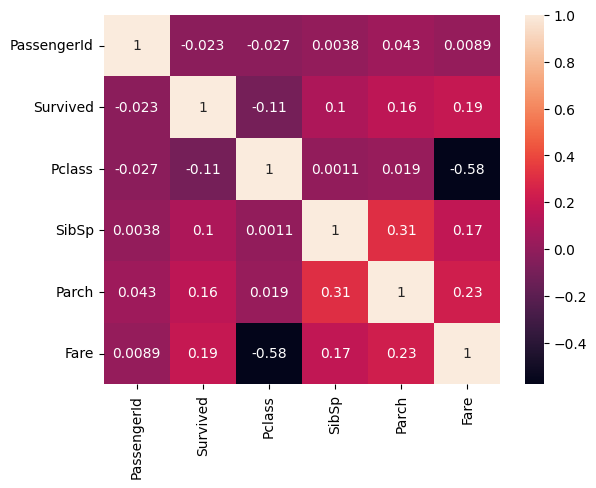

In [64]:
sns.heatmap(df_new.corr(), annot=True);

In [66]:
df.shape

(418, 12)

In [19]:
name, school = "Femi", "Futa"

In [20]:
name

'Femi'

In [21]:
school

'Futa'

In [22]:
df_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [68]:
df['Cabin'].value_counts()

0                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: Cabin, Length: 77, dtype: int64

In [69]:
variab = 'Femi'

In [70]:
variab[0]

'F'

In [71]:
df['Cabin'].dtype

dtype('O')

In [72]:
#extract the first character of the cabin column
df['Cabin_initial'] = df['Cabin'].apply(lambda x: str(x)[0])

In [73]:
df['Cabin_initial'].value_counts()

0    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_initial, dtype: int64

In [74]:
# replace the value 0 with 'general'
df['Cabin_initial'] = df['Cabin_initial'].replace('0','general')

In [75]:
df['Cabin_initial'].value_counts()

general    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: Cabin_initial, dtype: int64

In [76]:
cabin = pd.get_dummies(df['Cabin_initial'])

In [77]:
cabin

,A,B,C,D,E,F,G,general
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,1
414,0,0,1,0,0,0,0,0
415,0,0,0,0,0,0,0,1
416,0,0,0,0,0,0,0,1


In [78]:
df = pd.concat([df, cabin], axis=1)

In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_initial', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'general'],
      dtype='object')

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_initial,A,B,C,D,E,F,G,general
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,Q,general,0,0,0,0,0,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,S,general,0,0,0,0,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,Q,general,0,0,0,0,0,0,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,S,general,0,0,0,0,0,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,S,general,0,0,0,0,0,0,0,1


In [81]:
df.corr()['Survived']

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.006940
SibSp          0.099943
Parch          0.159120
Fare           0.192444
A              0.017617
B              0.060134
C              0.112625
D              0.007813
E              0.024919
F              0.003300
G              0.064781
general       -0.131464
Name: Survived, dtype: float64

In [82]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Cabin_initial    0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
general          0
dtype: int64

In [83]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [84]:
#1 = yes, 0 = No
sex = pd.get_dummies(df['Sex'])

In [85]:
embarked = pd.get_dummies(df['Embarked'])

In [86]:
# concat is also merge
df = pd.concat([df, sex, embarked], axis=1)

In [87]:
df.drop(['Name','Sex','Embarked','Cabin','Ticket','Cabin_initial'], axis=1, inplace=True)

In [88]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
A                uint8
B                uint8
C                uint8
D                uint8
E                uint8
F                uint8
G                uint8
general          uint8
female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
dtype: object

In [89]:
X = df.drop('Survived', axis=1)

In [90]:
y = df['Survived']

In [91]:
from sklearn.model_selection import train_test_split

train_test_split()

X_train = The features we are going to be using in training our model

y_train = The label to be predicted that we would be supplying to our model

X_test = The features that we would be keeping for testing our model after training

y_test = The labels we expect to be the correct answer when testing our model. We would need to compare the y_test vs our predicted values later on to calculate our model accuracy

In [92]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [93]:
X_train.shape

(292, 19)

In [94]:
y_train.shape

(292,)

In [95]:
X_test.shape

(126, 19)

In [96]:
y_test.shape

(126,)

In [97]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,A,B,C,D,E,F,G,general,female,male,C,Q,S
150,1042,1,23.0,0,1,83.1583,0,0,1,0,0,0,0,0,1,0,1,0,0
80,972,3,6.0,1,1,15.2458,0,0,0,0,0,0,0,1,0,1,1,0,0
346,1238,2,26.0,0,0,13.0000,0,0,0,0,0,0,0,1,0,1,0,0,1
377,1269,2,21.0,0,0,11.5000,0,0,0,0,0,0,0,1,0,1,0,0,1
272,1164,1,26.0,1,0,136.7792,0,0,1,0,0,0,0,0,1,0,1,0,0


In [98]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,A,B,C,D,E,F,G,general,female,male,C,Q,S
98,990,3,20.00,0,0,7.8542,0,0,0,0,0,0,0,1,1,0,0,0,1
197,1089,3,18.00,0,0,7.7750,0,0,0,0,0,0,0,1,1,0,0,0,1
369,1261,2,29.00,0,0,13.8583,0,0,0,0,0,0,0,1,0,1,1,0,0
201,1093,3,0.33,0,2,14.4000,0,0,0,0,0,0,0,1,0,1,0,0,1
129,1021,3,24.00,0,0,8.0500,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,907,2,24.00,1,0,27.7208,0,0,0,0,0,0,0,1,1,0,1,0,0
409,1301,3,3.00,1,1,13.7750,0,0,0,0,0,0,0,1,1,0,0,0,1
60,952,3,17.00,0,0,7.8958,0,0,0,0,0,0,0,1,0,1,0,0,1
184,1076,1,27.00,1,1,247.5208,0,1,0,0,0,0,0,0,1,0,1,0,0


In [99]:
y_test

98     1
197    1
369    0
201    0
129    0
      ..
15     1
409    1
60     0
184    1
84     0
Name: Survived, Length: 126, dtype: int64

In [100]:
y_train

150    1
80     0
346    0
377    0
272    1
      ..
343    1
359    1
323    0
280    1
8      1
Name: Survived, Length: 292, dtype: int64

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'general', 'female', 'male', 'C',
       'Q', 'S'],
      dtype='object')

In [102]:
#Import logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [103]:
#Initialise the model
logmodel = LogisticRegression()

In [104]:
#Train my model using X_train and y_train data
logmodel.fit(X_train, y_train)

C:\Users\toluh\anaconda3\envs\covenmlcohort\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
#Predict an example data e.g. my test data and store the result in a variable called prediction
prediction = logmodel.predict(X_test)

In [106]:
prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [107]:
y_test

98     1
197    1
369    0
201    0
129    0
      ..
15     1
409    1
60     0
184    1
84     0
Name: Survived, Length: 126, dtype: int64

### Evaluation

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [109]:
accuracy_score(y_test, prediction)

1.0

In [110]:
#Download my model
import pickle

In [111]:
pickle.dump(logmodel, open('firtlogmodel.sav', 'wb'))

In [112]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'general', 'female', 'male', 'C',
       'Q', 'S'],
      dtype='object')

In [113]:
submission = df[['PassengerId','Survived']]

In [114]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
submission.to_csv('submission.csv', index=False)